In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets,transforms
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

%matplotlib inline 

DEVICE = ('cuda' if torch.cuda.is_available() else 'cpu')
print('Using {} device'.format(DEVICE))

Using cuda device


In [2]:
preprocess = transforms.Compose([
                                transforms.Resize((227, 227)),
                                transforms.ToTensor(),
                                #nomalize 값은 구글링을 통해 알아내었음
                                #grayscale이기 때문에 채널은 한개만 존재
                                transforms.Normalize((0.1307,), (0.3081,))
                                ])

In [3]:
train_Set = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=preprocess)
train_loader = torch.utils.data.DataLoader(train_Set, batch_size=64, shuffle=True)


test_Set = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=preprocess)
test_loader = torch.utils.data.DataLoader(test_Set, batch_size=64, shuffle=True)

c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
print('**train**\n',train_Set,'\n--------------------------------------------------------------------------')
print('**test**\n',test_Set)

#출력 테스트
print(train_Set[13])

**train**
 Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: C:\Users\Administrator/.pytorch/F_MNIST_data/
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(227, 227), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           ) 
--------------------------------------------------------------------------
**test**
 Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: C:\Users\Administrator/.pytorch/F_MNIST_data/
    Split: Test
    StandardTransform
Transform: Compose(
               Resize(size=(227, 227), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )
(tensor([[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -

**test**
---------------------------
<class 'torch.Tensor'>
torch.Size([1, 227, 227])
0
---------------------------
type of label :  <class 'int'>
label :  0


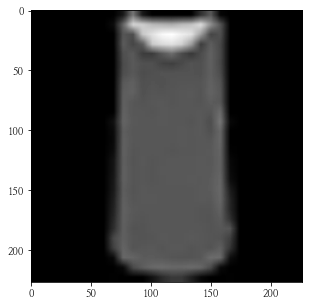

In [5]:
img, label = train_Set[2]
print('**test**\n---------------------------')
print(type(img))
print(img.shape)
print(label)
print('---------------------------')

plt.figure(figsize=(5, 5))
plt.imshow(img.squeeze().numpy(), cmap='gray')
print("type of label : ", type(label))
print("label : ", label)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

출력 index :  [3556, 25525, 27322, 37433, 16151, 53034, 56200, 43567, 33582, 41452] / 총 10 개 이미지


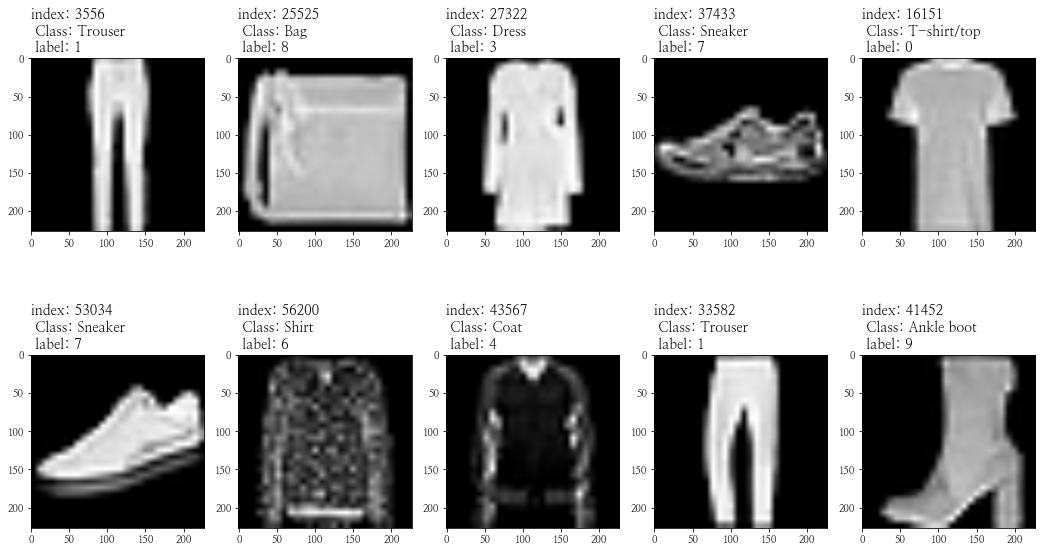

In [6]:
import random

#이미지 배열로 살펴보기

range_List = []

#리스트에 random index 저장
for i in range(10):
    ran = random.randint(0,59999)
    range_List.append(ran)
print('출력 index : ',range_List,'/ 총',len(range_List),'개 이미지')


#figure size / 배열 설정
rows = 2
columns = 5
img_index = 0
plt.rcParams['figure.figsize'] = (18.0, 10.0)


title_font = {
    'fontsize': 14,
}

#figure안에 이미지 넣기
for i in range_List :
    img_index += 1
    img, label = train_Set[i]
    header = 'index: {} \n Class: {} \n label: {}'.format(i,class_names[label],label)
    
    plt.subplot(rows, columns, img_index)
    plt.title(header,fontdict=title_font,loc='left')
    plt.imshow(img.squeeze().numpy(), cmap='gray')
    

plt.show()


In [7]:
#모델 작성 시작

class Alex_Mnist(nn.Module):
    def __init__(self, num_classes=1000):
        super().__init__()
        self.features = nn.Sequential(
            #1st layer
            nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=0),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            #2nd layer
            nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            #3rd layer
            nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            #4th layer
            nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            #5th layer
            nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        
        #fc
        #6th layer
        self.fc1 = nn.Linear(256 * 6 * 6, 4096)
        #7th layer
        self.fc2 = nn.Linear(4096, 4096)
        #8th layer
        self.fc3 = nn.Linear(4096, 10)

    def forward(self, x):
        out = self.features(x)
        out = out.view(out.size(0), -1)
        out = F.relu(self.fc1(out))
        out = F.dropout(out, 0.5)
        out = F.relu(self.fc2(out))
        out = F.dropout(out, 0.5)
        out = self.fc3(out)
        out = F.log_softmax(out, dim=1)

        return out

In [8]:
model = Alex_Mnist().to(DEVICE)
criterion = F.nll_loss
optimizer = torch.optim.Adam(model.parameters())

EPOCHS = 10

In [9]:
def train(model, device, train_loader, optimer, epoch):
    model.train()
    T_loss = 0
    
    for batch_idx, (data, target) in enumerate(train_loader):
        target = target.type(torch.LongTensor)
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        if (batch_idx + 1) % 300 == 0:
            print("epoch:{} [{}/{} ({:.0f}%)] \t Loss: {:.6f}".format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

In [10]:
A_loss = []
V_Accuracy = []

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target, reduction='sum').item()
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()
            
        
        loss = test_loss/10000
        loss = round(loss,4)
        A_loss.append(loss)
        
        acc = 100. * correct / len(test_loader.dataset)
        acc = round(acc)
        V_Accuracy.append(acc)
        
        test_loss /= len(test_loader.dataset)
        print("\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n".format(
            test_loss, correct, len(test_loader.dataset), 100. * correct / len(test_loader.dataset)))
        print('='*50)
        

In [11]:
EPOCH = []

for epoch in range(EPOCHS):
    train(model, DEVICE, train_loader, optimizer, epoch)
    test(model, DEVICE, test_loader)
    EPOCH.append(epoch)
    

epoch:0 [19136/60000 (32%)] 	 Loss: 0.519415
epoch:0 [38336/60000 (64%)] 	 Loss: 0.459490
epoch:0 [57536/60000 (96%)] 	 Loss: 0.388094

Test set: Average loss: 0.3969, Accuracy: 8534/10000 (85%)

epoch:1 [19136/60000 (32%)] 	 Loss: 0.308814
epoch:1 [38336/60000 (64%)] 	 Loss: 0.462163
epoch:1 [57536/60000 (96%)] 	 Loss: 0.301632

Test set: Average loss: 0.3229, Accuracy: 8816/10000 (88%)

epoch:2 [19136/60000 (32%)] 	 Loss: 0.429194
epoch:2 [38336/60000 (64%)] 	 Loss: 0.318625
epoch:2 [57536/60000 (96%)] 	 Loss: 0.310278

Test set: Average loss: 0.3368, Accuracy: 8757/10000 (88%)

epoch:3 [19136/60000 (32%)] 	 Loss: 0.451475
epoch:3 [38336/60000 (64%)] 	 Loss: 0.203639
epoch:3 [57536/60000 (96%)] 	 Loss: 0.263352

Test set: Average loss: 0.2959, Accuracy: 8938/10000 (89%)

epoch:4 [19136/60000 (32%)] 	 Loss: 0.200040
epoch:4 [38336/60000 (64%)] 	 Loss: 0.130386
epoch:4 [57536/60000 (96%)] 	 Loss: 0.278021

Test set: Average loss: 0.2997, Accuracy: 8941/10000 (89%)

epoch:5 [19136/60000

In [12]:
print(V_Accuracy)
print(A_loss)
print(EPOCH)

[85, 88, 88, 89, 89, 90, 89, 90, 90, 87]
[0.3969, 0.3229, 0.3368, 0.2959, 0.2997, 0.3009, 0.2889, 0.3023, 0.2936, 0.4005]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


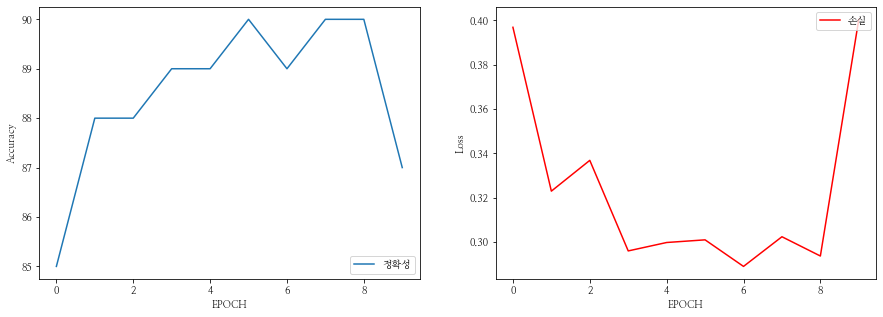

In [13]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.xlabel("EPOCH") 
plt.ylabel("Accuracy")
plt.plot(EPOCH,V_Accuracy,label='정확성')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.xlabel("EPOCH") 
plt.ylabel("Loss")
plt.plot(EPOCH,A_loss,'r', label='손실')
plt.legend(loc='upper right')

plt.show()